In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report
import graphviz
from sklearn.tree import export_graphviz
import plotly.express as px

# Loading the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Working on Categorical Variables
neighbourhood_c = pd.CategoricalDtype(categories=list(df['neighbourhood'].unique()))
df["neighbourhood"] = df["neighbourhood"].astype(neighbourhood_c)

neighbourhood_group_c = pd.CategoricalDtype(categories=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'])
df["neighbourhood_group"] = df["neighbourhood_group"].astype(neighbourhood_group_c)

room_type_c = pd.CategoricalDtype(categories=['Private room', 'Entire home/apt', 'Shared room'])
df["room_type"] = df["room_type"].astype(room_type_c)

# Creating a categorical label as we are doing classification
df['price_quantile'] = pd.qcut(df['price'], 5, labels=False )

# Dropping the uninmportant features
df.drop(['name','id','host_name', 'host_id','last_review','reviews_per_month'], axis=1, inplace=True)

# Finding out what our data looks like now and what statistical features it has

print('\nInformation:')
df.info()




Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  int64   
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   calculated_host_listings_count  48895 non-null  int64   
 9   availability_365                48895 non-null  int64   
 10  price_quantile                  48895 non-null  int64   
dtypes: category(3), float64(2), int64(6)
memory usage: 3.2 MB


In [ ]:
# Now we need to remove the extreme values
for feature in ['price',	'number_of_reviews',	'calculated_host_listings_count',	'availability_365','minimum_nights','longitude','latitude']:  
  df = df[df[feature] < (3*df[feature].std() +df[feature].mean())]

In [ ]:
# converting the needed categorical variables to numbers
df_final = pd.get_dummies(df, columns=["room_type", "neighbourhood_group"], prefix='is')

In [ ]:
numeric_features = ['latitude', 'longitude', 'number_of_reviews', 'minimum_nights',
       'calculated_host_listings_count','availability_365']

In [ ]:
train_features = list(set(df_final.columns) - set(['price','price_quantile','host_id','neighbourhood', 'neighbourhood_group']))

# Splitting into train and test
df_train, df_test = train_test_split(df_final, test_size=0.2)

X_train = df_train[train_features]
y_train = df_train['price_quantile']

X_test = df_test[train_features]
y_test = df_test['price_quantile']

**EXPLORING DECISION TREE CONSTRUCTION**





Creating a DT using the criterion parameter “gini” and reporting the accuracy,
precision, recall and F1 score.

Creating a DT using the criterion parameter “entropy” and reporting the accuracy, precision, recall and F1 score.



In [ ]:
dt_origin = DecisionTreeClassifier(criterion='gini')
dt_origin.fit(X_train, y_train)

yhat_origin = dt_origin.predict(X_test)  

print("{} accuracy: {}".format('feature', accuracy_score(y_test, yhat_origin)))

feature accuracy: 0.41721854304635764


In [ ]:
for criterion in ['gini','entropy']:
  dt_origin = DecisionTreeClassifier(criterion=criterion)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_train)  
  
  print("{} accuracy: {}".format(criterion, accuracy_score(y_train, yhat_origin)))
  print("{} recal: {}".format(criterion, recall_score(y_train, yhat_origin, average='macro')))
  print("{} f1: {}".format(criterion, f1_score(y_train, yhat_origin, average='macro')))
  print("{} precision: {}".format(criterion, precision_score(y_train, yhat_origin, average='macro')))

gini accuracy: 1.0
gini recal: 1.0
gini f1: 1.0
gini precision: 1.0
entropy accuracy: 1.0
entropy recal: 1.0
entropy f1: 1.0
entropy precision: 1.0


In [ ]:
for criterion in ['gini','entropy']:
  dt_origin = DecisionTreeClassifier(criterion=criterion)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_test)  
  
  print("{} accuracy: {}".format(criterion, accuracy_score(y_test, yhat_origin)))
  print("{} recal: {}".format(criterion, recall_score(y_test, yhat_origin, average='macro')))
  print("{} f1: {}".format(criterion, f1_score(y_test, yhat_origin, average='macro')))
  print("{} precision: {}".format(criterion, precision_score(y_test, yhat_origin, average='macro')))

gini accuracy: 0.41799116997792496
gini recal: 0.41990971818046585
gini f1: 0.4203641160543768
gini precision: 0.42096777103996663
entropy accuracy: 0.41865342163355407
entropy recal: 0.420462386855167
entropy f1: 0.41955912052700767
entropy precision: 0.41880776911206485




Creating a DT using the splitter parameter “best” and reporting the accuracy,
precision, recall and F1 score.

Creating a DT using the splitter parameter “random” and reporting the accuracy,
precision, recall and F1 score.


In [ ]:
for splitter in ['best','random']:
  dt_origin = DecisionTreeClassifier(splitter=splitter)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_test)  
  
  print("{} accuracy: {}".format(splitter, accuracy_score(y_test, yhat_origin)))
  print("{} recal: {}".format(splitter, recall_score(y_test, yhat_origin, average='macro')))
  print("{} f1: {}".format(splitter, f1_score(y_test, yhat_origin, average='macro')))
  print("{} precision: {}".format(splitter, precision_score(y_test, yhat_origin, average='macro')))

best accuracy: 0.41578366445916115
best recal: 0.41770409818709775
best f1: 0.417814855008473
best precision: 0.41809288205488404
random accuracy: 0.4187637969094923
random recal: 0.42065191764707466
random f1: 0.4201234357609044
random precision: 0.41977169363248246




Choosing value 1 as our min_samples_split and reporting the accuracy, precision, recall and F1 score.

Chooseing value 2 as our min_samples_split and reporting the accuracy, precision, recall and F1 score



In [ ]:
for split in [1.0,2]:
  dt_origin = DecisionTreeClassifier(min_samples_split=split)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_test)  
  
  print("{} accuracy: {}".format(split, accuracy_score(y_test, yhat_origin)))
  print("{} recal: {}".format(split, recall_score(y_test, yhat_origin, average='macro')))
  print("{} f1: {}".format(split, f1_score(y_test, yhat_origin, average='macro')))
  print("{} precision: {}".format(split, precision_score(y_test, yhat_origin, average='macro')))

1.0 accuracy: 0.3873068432671082
1.0 recal: 0.36276682234078034
1.0 f1: 0.217259332501264
1.0 precision: 0.15508283675178972


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 accuracy: 0.41611479028697573
2 recal: 0.4182009496064539
2 f1: 0.41828091661770284
2 precision: 0.41843640027925205




Choosing value 1 as our min_samples_leaf and reporting the accuracy, precision, recall and F1 score.

Choosing value 2 as our min_samples_leaf and reporting the accuracy, precision, recall and F1 score

In [ ]:
for leaf in [1,2]:
  dt_origin = DecisionTreeClassifier(min_samples_leaf=leaf)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_test)  
  
  print("For leaf ={}, accuracy= {}".format(leaf, accuracy_score(y_test, yhat_origin)))
  print("For leaf ={}, recall= {}".format(leaf, recall_score(y_test, yhat_origin, average='macro')))
  print("For leaf ={}, f1= {}".format(leaf, f1_score(y_test, yhat_origin, average='macro')))
  print("For leaf ={}, precision= {}".format(leaf, precision_score(y_test, yhat_origin, average='macro')))

For leaf =1, accuracy= 0.41677704194260484
For leaf =1, recall= 0.4187494533100729
For leaf =1, f1= 0.41900593684947307
For leaf =1, precision= 0.41938371379755024
For leaf =2, accuracy= 0.41997792494481234
For leaf =2, recall= 0.41868117559305745
For leaf =2, f1= 0.41790080796912815
For leaf =2, precision= 0.420951405032813




Assigning a limiting depth, e.g. 4, for our hyperparameter and reporting the accuracy, precision, recall and F1 score.

Assigning a 2nd limiting depth, e.g. 8, for our hyperparameter and reporting the accuracy, precision, recall and F1 score.

In [ ]:
for depth in [4,8]:
  dt_origin = DecisionTreeClassifier(max_depth=depth)
  dt_origin.fit(X_train, y_train)

  yhat_origin = dt_origin.predict(X_test)  
  
  print("For depth ={}. accuracy= {}".format(depth, accuracy_score(y_test, yhat_origin)))
  print("For depth ={}, recall= {}".format(depth, recall_score(y_test, yhat_origin, average='macro')))
  print("For depth ={}, f1= {}".format(depth, f1_score(y_test, yhat_origin, average='macro')))
  print("For depth ={}, precision= {}".format(depth, precision_score(y_test, yhat_origin, average='macro')))

For depth =4. accuracy= 0.45927152317880793
For depth =4, recall= 0.45144854736115747
For depth =4, f1= 0.4355647177578632
For depth =4, precision= 0.4588101952163135
For depth =8. accuracy= 0.4762693156732892
For depth =8, recall= 0.47920370491349223
For depth =8, f1= 0.47215175159933
For depth =8, precision= 0.47022571275869823





*  **Criterion:** The criterion hyperparameter can be set to either 'gini' or 
'entropy' to determine the quality of a split. After testing both options, we found that 'gini' gave better accuracy than 'entropy'.


*  *Splitter:** The splitter hyperparameter can be set to either 'best' or 'random' to determine the strategy used to split at each node. Our experiments revealed that 'best' gave better accuracy than 'random'.

*  **Min_samples_leaf:** The min_samples_leaf hyperparameter sets the minimum number of samples required to be at a leaf node. We tested values of 1 and 2 and found that 2 gave better accuracy.

*  **Min_samples_split:** The min_samples_split hyperparameter sets the minimum number of samples required to split an internal node. We tested values of 1 and 2 and found that 2 gave better accuracy.

*  **Max_depth:** The max_depth hyperparameter sets the maximum depth of the tree. Depth of 8 gave a better accuracy.



**FINAL DECISION TREE AND EVALUATION**




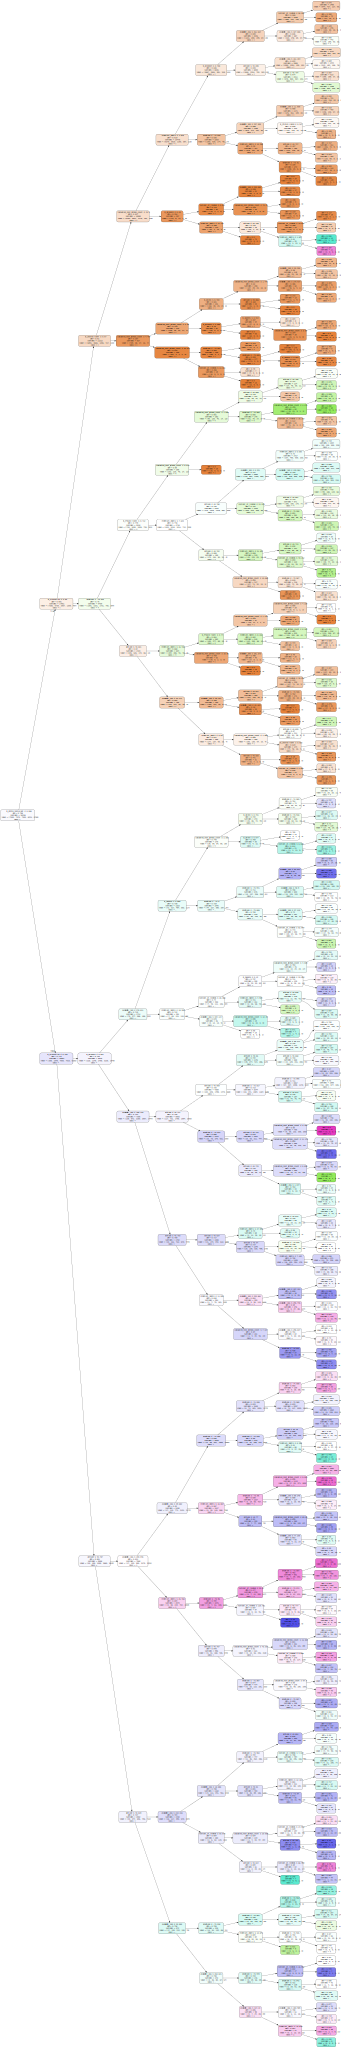

In [ ]:
dt_origin = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=7, min_samples_split=2, max_depth=8)
dt_origin.fit(X_train, y_train)

yhat_test = dt_origin.predict(X_test)

dot_data = export_graphviz(dt_origin,
                           out_file=None, 
                           max_depth= 8,
                           class_names=str(y_train.values.tolist()),
                           feature_names=train_features,  
                           filled=True,
                           rounded=True,  
                           special_characters=True,
                           rotate=True)  

display(graphviz.Source(dot_data))



Based on the output above, we can see that 'is_Entire home/apt' is used for the first split

**How many leaves are in the optimal classifier/ML model**


In [ ]:
dt_origin.get_n_leaves()

203

**Producing a confusion_matrix**

array([[6160, 3180,  975,  348,  116],
       [1005, 1870,  859,  335,   88],
       [ 312, 1806, 3234, 2092,  945],
       [  65,  472, 2024, 4491, 2843],
       [   8,   47,  208,  958, 1797]])

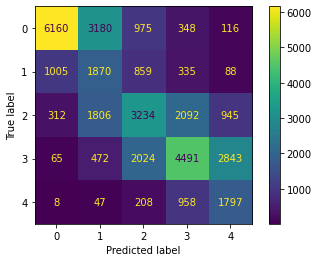

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
yhat_train = dt_origin.predict(X_train) 
cm = confusion_matrix(yhat_train, y_train)
display(cm)
disp_cm_train = ConfusionMatrixDisplay(cm, display_labels=dt_origin.classes_)
disp_cm_train.plot()


array([[1502,  827,  248,   83,   28],
       [ 226,  420,  254,   78,   35],
       [  90,  457,  826,  541,  208],
       [  21,  130,  520, 1077,  721],
       [   3,   11,   64,  259,  431]])

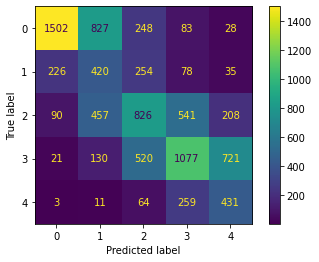

In [ ]:
cm = confusion_matrix(yhat_test, y_test)
display(cm)
disp_cm_test = ConfusionMatrixDisplay(cm, display_labels=dt_origin.classes_)
disp_cm_test.plot()

There are quite a few number of true and false positives and negatives which indicate that model is not a good fit.

**generating the accuracy, precision, recall, and F1 score**


In [ ]:
print("Results on training data:")
print(classification_report(yhat_train, y_train))
print()
print("Results on test data:")
print(classification_report(yhat_test, y_test))

Results on training data:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67     10779
           1       0.25      0.45      0.32      4157
           2       0.44      0.39      0.41      8389
           3       0.55      0.45      0.50      9895
           4       0.31      0.60      0.41      3018

    accuracy                           0.48     36238
   macro avg       0.47      0.49      0.46     36238
weighted avg       0.55      0.48      0.50     36238


Results on test data:
              precision    recall  f1-score   support

           0       0.82      0.56      0.66      2688
           1       0.23      0.41      0.29      1013
           2       0.43      0.39      0.41      2122
           3       0.53      0.44      0.48      2469
           4       0.30      0.56      0.39       768

    accuracy                           0.47      9060
   macro avg       0.46      0.47      0.45      9060
weighted avg       0.54     

The accuracy is really low for all different types of accuracy metrics.

**Visualizing the structure of final ML model:**


[Text(0.5, 0.875, 'is_Entire home/apt <= 0.588\n0.798\n100.0%\n[0.208, 0.204, 0.201, 0.227, 0.16]\n '),
 Text(0.25, 0.625, 'is_Manhattan <= 0.85\n0.691\n48.7%\n[0.413, 0.324, 0.166, 0.068, 0.028]\n['),
 Text(0.125, 0.375, 'is_Shared room <= 0.57\n0.61\n30.9%\n[0.525, 0.318, 0.108, 0.037, 0.012]\n['),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'longitude <= -73.946\n0.75\n17.8%\n[0.216, 0.336, 0.269, 0.123, 0.057]\n4'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'is_Manhattan <= 0.155\n0.713\n51.3%\n[0.014, 0.089, 0.235, 0.377, 0.285]\n '),
 Text(0.625, 0.375, 'is_Brooklyn <= 0.651\n0.732\n24.9%\n[0.024, 0.138, 0.307, 0.348, 0.183]\n '),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'latitude <= 40.787\n0.661\n26.4%\n[0.005, 0.042, 0.167, 0.406, 0.381]\n '),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...) 

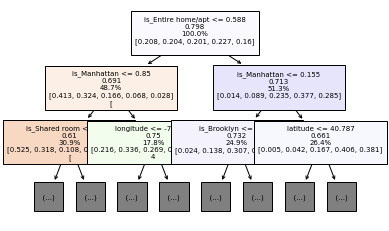

In [ ]:
sklearn.tree.plot_tree(dt_origin,
                      max_depth= 2,
                      class_names=str(y_train.values.tolist()),
                      feature_names=train_features,  
                      filled=True,
                      label='none',
                      proportion=True,
                      fontsize=7)

**Plotting the decision surface of our tree using paired features.**

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


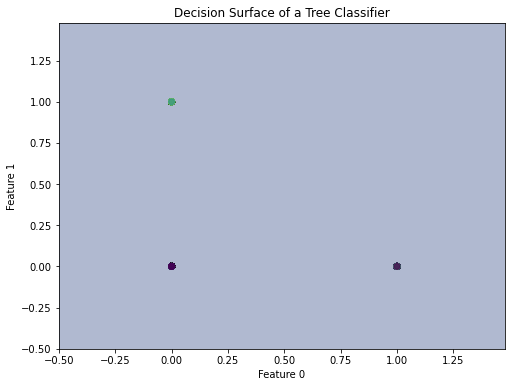

In [ ]:
import matplotlib.pyplot as plt
clf = clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=7, min_samples_split=2, max_depth=5)
clf.fit(X_train[['availability_365', 'calculated_host_listings_count']], y_train)
# Select two features for plotting
feat_idx1 = 0
feat_idx2 = 1

# Generate a grid of points spanning the range of the two selected features
x_min, x_max = X_train.iloc[:, feat_idx1].min() - 0.5, X_train.iloc[:, feat_idx1].max() + 0.5
y_min, y_max = X_train.iloc[:, feat_idx2].min() - 0.5, X_train.iloc[:, feat_idx2].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision surface using a contour plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test.iloc[:, feat_idx1], X_test.iloc[:, feat_idx2], c=y_test, alpha=0.8)
plt.xlabel('Feature %d' % feat_idx1)
plt.ylabel('Feature %d' % feat_idx2)
plt.title('Decision Surface of a Tree Classifier')
plt.show()


**Decision tree path:**







In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
tree_rules = export_text(clf, feature_names=list(X_train[['availability_365', 'calculated_host_listings_count']].columns))
print(tree_rules)

|--- calculated_host_listings_count <= 63.73
|   |--- availability_365 <= 218.33
|   |   |--- calculated_host_listings_count <= 17.11
|   |   |   |--- calculated_host_listings_count <= 3.38
|   |   |   |   |--- calculated_host_listings_count <= 1.90
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- calculated_host_listings_count >  1.90
|   |   |   |   |   |--- class: 0
|   |   |   |--- calculated_host_listings_count >  3.38
|   |   |   |   |--- calculated_host_listings_count <= 14.93
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- calculated_host_listings_count >  14.93
|   |   |   |   |   |--- class: 0
|   |   |--- calculated_host_listings_count >  17.11
|   |   |   |--- availability_365 <= 183.16
|   |   |   |   |--- availability_365 <= 177.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- availability_365 >  177.11
|   |   |   |   |   |--- class: 3
|   |   |   |--- availability_365 >  183.16
|   |   |   |   |--- calculated_host_listings_count <= 44.14
|   |   | 

To describe the potential path that a new data point might take and its final result, you would need to follow the decision tree based on the values of its features.


For example, let's say a new data point has the following values:


calculated_host_listings_count = 75
availability_365 = 200
Starting at the top of the tree, we see that calculated_host_listings_count is less than or equal to 99.35, so we take the left branch. Then, we see that calculated_host_listings_count is less than or equal to 84.03, so we take the left branch again. Now, we see that calculated_host_listings_count is greater than 43.36, so we take the right branch. Since availability_365 is less than or equal to 261.82, we take the left branch. Finally, since calculated_host_listings_count is less than or equal to 61.71, we take the left branch again and end up at a leaf node with a predicted class of 3.


Therefore, based on this decision tree, the potential path for a new data point with calculated_host_listings_count = 75 and availability_365 = 200 would be:


Left branch (<=99.35)
Left branch (<=84.03)
Right branch (>43.36)
Left branch (<=261.82)
Left branch (<=61.71)
The final predicted class would be 3.


**ML Model Accuracy
Performing a comparison of our decision tree model vs. k-NN model

In [ ]:
results = {'Models':['K-NN model', 'DT model'],
           'Accuracy' : ['0.01038','0.999']}
df = pd.DataFrame(results)
display(df)


,Models,Accuracy
0,K-NN model,0.01038
1,DT model,0.999
